In [1]:
import os, sys
import numpy as np 

from provabgs import infer as Infer
from provabgs import models as Models

In [2]:
import matplotlib.pyplot as plt

In [3]:
dat_dir = '/Users/chahah/data/provabgs/emulator/'

In [4]:
thetas = np.load(os.path.join(dat_dir, 'fsps.burst.theta.seed0.npy'))
lnspec = np.load(os.path.join(dat_dir, 'fsps.burst.lnspectrum.seed0.npy'))

In [5]:
Msps = Models.NMF(burst=True, emulator=False)
# load SPS model  
Msps._ssp_initiate()

input parameters : logmstar, beta1_sfh, beta2_sfh, beta3_sfh, beta4_sfh, fburst, tburst, gamma1_zh, gamma2_zh, dust1, dust2, dust_index


In [15]:
Msps._ssp.libraries

(b'mist', b'miles', b'DL07  ')

In [17]:
Msps._ssp.params['dust_tesc']

7.0

In [6]:
def lssp_burst(_theta): 
    tburst, zburst, dust1, dust2, dust_index = _theta 
    # luminosity of SSP at tburst 
    Msps._ssp.params['logzsol'] = np.log10(zburst/0.0190) # log(Z/Zsun)
    Msps._ssp.params['dust1'] = dust1
    Msps._ssp.params['dust2'] = dust2 
    Msps._ssp.params['dust_index'] = dust_index

    return Msps._ssp.get_spectrum(tage=np.clip(tburst, 1e-8, None), peraa=True) # in units of Lsun/AA

def lssp_burst_nodust1(_theta): 
    tburst, zburst, dust1, dust2, dust_index = _theta 
    # luminosity of SSP at tburst 
    Msps._ssp.params['logzsol'] = np.log10(zburst/0.0190) # log(Z/Zsun)
    Msps._ssp.params['dust1'] = 0.
    Msps._ssp.params['dust2'] = dust2 
    Msps._ssp.params['dust_index'] = dust_index

    return Msps._ssp.get_spectrum(tage=np.clip(tburst, 1e-8, None), peraa=True) # in units of Lsun/AA

In [19]:
thetas[26]

array([ 0.01035542,  0.01832959,  1.45123797,  2.02339371, -2.87420485])

In [20]:
wave, lssp0 = lssp_burst(thetas[26])
_, lssp1 = lssp_burst_nodust1(thetas[26])

(1000.0, 10000.0)

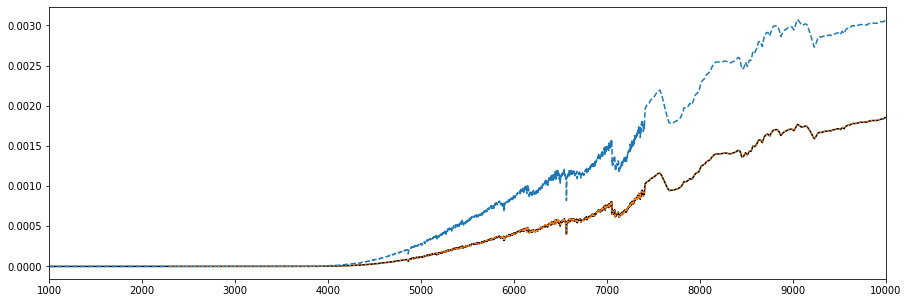

In [22]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
sub.plot(wave, lssp0, c='k')
sub.plot(wave, lssp1, c='C0', ls='--')
sub.plot(wave[(wave > 2300.) & (wave < 60000.)], np.exp(lnspec[26]), c='C1', ls=':')
sub.set_xlim(1e3, 1e4)

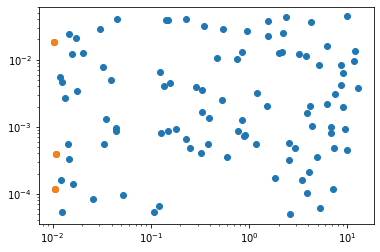

In [14]:
plt.scatter(thetas[:100,0], thetas[:100,1])
plt.scatter(thetas[:,0][np.array([26, 29, 78])], thetas[:,1][np.array([26, 29, 78])])
plt.xscale('log')
plt.yscale('log')

26
[ 0.01035542  0.01832959  1.45123797  2.02339371 -2.87420485]
29
[1.07952314e-02 3.96161227e-04 5.51537709e-01 2.10529124e+00
 1.90106966e-01]
78
[ 1.05610074e-02  1.16865554e-04  1.86843399e+00  2.99188920e+00
 -2.06655768e+00]


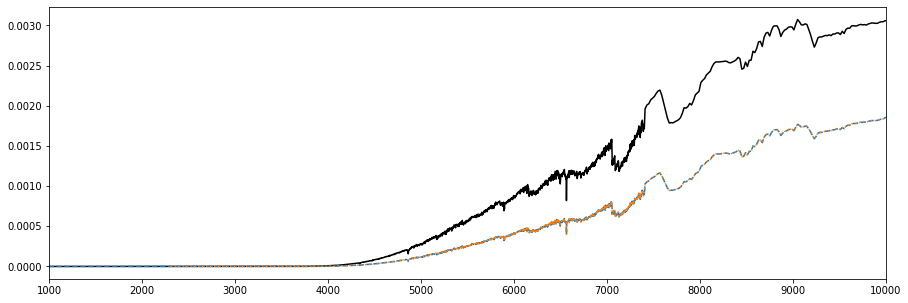

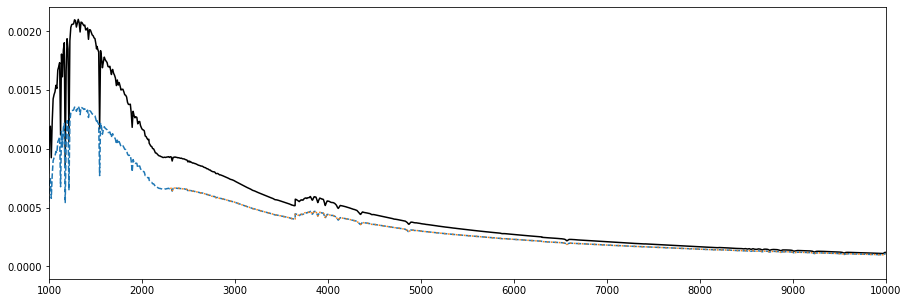

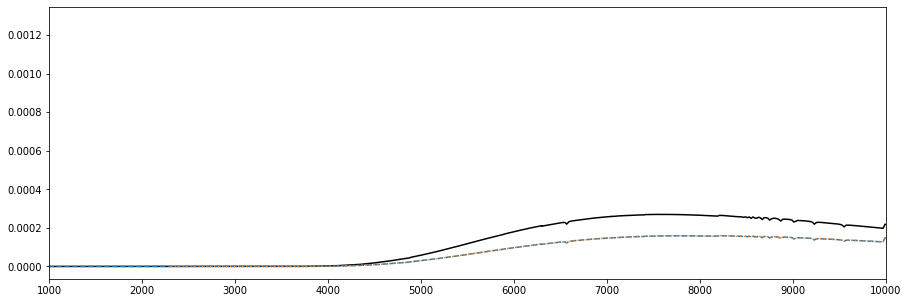

In [23]:
for i in range(100): 
    _, _lssp = lssp_burst_nodust1(thetas[i])
    if not np.all(np.isclose(np.exp(lnspec[i]), _lssp[(wave > 2300.) & (wave < 60000.)])): 
        print(i)
        print(thetas[i])
        _, _lssp1 = lssp_burst(thetas[i])
        fig = plt.figure(figsize=(15,5))
        sub = fig.add_subplot(111)
        sub.plot(wave, _lssp, c='k')
        sub.plot(wave, _lssp1, c='C0', ls='--')

        sub.plot(wave[(wave > 2300.) & (wave < 60000.)], np.exp(lnspec[i]), c='C1', ls=':')
        sub.set_xlim(1e3, 1e4)

0.01
0.01001
0.01002
0.01003
0.01004
0.01005
0.01006
0.01007
0.01008
0.01009
0.0101
0.010110000000000001
0.01012
0.01013
0.01014
0.010150000000000001
0.01016
0.01017
0.01018
0.01019
0.0102
0.01021
0.01022
0.01023
0.01024
0.01025
0.01026
0.01027
0.010280000000000001
0.01029
0.0103
0.01031
0.010320000000000001
0.01033
0.01034
0.01035
0.01036
0.01037
0.01038
0.01039
0.0104
0.01041
0.01042
0.01043
0.01044
0.010450000000000001
0.01046
0.01047
0.01048
0.010490000000000001
0.0105
0.01051
0.01052
0.010530000000000001
0.01054
0.01055
0.01056
0.01057
0.01058
0.01059
0.0106
0.01061
0.010620000000000001
0.01063
0.01064
0.01065
0.010660000000000001
0.01067
0.01068
0.01069
0.010700000000000001
0.01071
0.01072
0.01073
0.01074
0.010750000000000001
0.01076
0.01077
0.01078
0.010790000000000001
0.0108
0.01081
0.01082
0.010830000000000001
0.01084
0.01085
0.01086
0.010870000000000001
0.01088
0.01089
0.0109
0.01091
0.010920000000000001
0.01093
0.01094
0.01095
0.010960000000000001
0.01097
0.01098
0.01099
0.0

(1000.0, 10000.0)

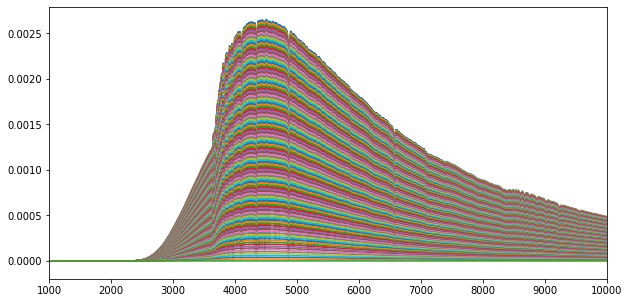

In [38]:
_theta = thetas[0].copy()

fig = plt.figure(figsize=(10, 5))
sub = fig.add_subplot(111)

for i in np.arange(1000): 
    _theta[0] = 0.01 + i * 0.00001

    _, lssp0 = lssp_burst(_theta)
    _, lssp1 = lssp_burst_nodust1(_theta)
    if not np.all(np.isclose(lssp1, lssp0)):
        sub.plot(wave, lssp1 - lssp0, c='C%i' % i)
        print(_theta[0])
    
sub.set_xlim(1e3, 1e4)    

In [39]:
def lssp_burst_nodust(_theta): 
    tburst, zburst, dust1, dust2, dust_index = _theta 
    # luminosity of SSP at tburst 
    Msps._ssp.params['logzsol'] = np.log10(zburst/0.0190) # log(Z/Zsun)
    Msps._ssp.params['dust1'] = 0.
    Msps._ssp.params['dust2'] = 0. 
    return Msps._ssp.get_spectrum(tage=np.clip(tburst, 1e-8, None), peraa=True) # in units of Lsun/AA

In [40]:
%timeit lssp_burst_nodust(thetas[0])

37.6 µs ± 1.99 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [41]:
%timeit lssp_burst_nodust1(thetas[0])

38.2 µs ± 1.43 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [1]:
import fsps

In [2]:
import matplotlib.pyplot as plt

In [3]:
ssp = fsps.StellarPopulation(dust_type=4, imf_type=1)

In [4]:
ssp.params['dust_tesc']

7.0

In [5]:
ssp.params['dust1'] = 0.9
ssp.params['dust2'] = 0.5

w, lssp_w_dust1 = ssp.get_spectrum(tage=1.1e-2)

In [6]:
ssp.params['dust1'] = 0.
ssp.params['dust2'] = 0.5

_, lssp_wo_dust1 = ssp.get_spectrum(tage=1.1e-2)

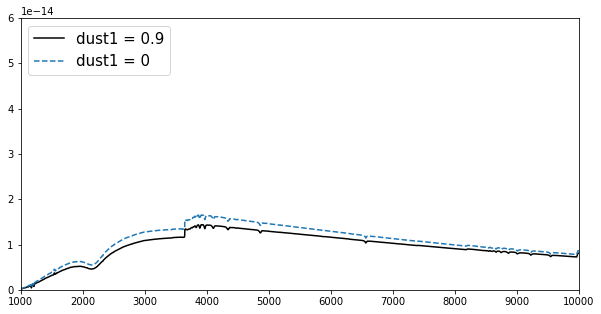

In [7]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
sub.plot(w, lssp_w_dust1, c='k', label='dust1 = 0.9')
sub.plot(w, lssp_wo_dust1, c='C0', ls='--', label='dust1 = 0')
sub.set_xlim(1e3, 1e4)
sub.set_ylim(0., 6e-14)
sub.legend(loc='upper left', fontsize=15)